In [1]:
from env.windy_gridworld import WindyGridWorld
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [50]:
ROWS = 7
COLUMNS = 10
WIND_LOC = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
# Tuples are row column
TARGET_LOC = [3, 7]
INIT_LOCATION = [3, 0]

# Set up the environment
env = WindyGridWorld(rows=ROWS, columns=COLUMNS, init_location=np.array(INIT_LOCATION), king_move=True)
NUM_ACTIONS = int(env.action_space.n)
env.target_location = np.array(TARGET_LOC)
env.wind_location = np.array(WIND_LOC)

In [51]:
# Define state-action value function
Q = np.zeros(shape=(ROWS, COLUMNS, NUM_ACTIONS), dtype=np.float32)
N = np.zeros_like(Q, dtype=np.float32)
gamma = 1.0
alpha = 0.5
epsilon = 0.1
episodes = 170
global_steps = 0
step_episode = []

for episode in range(episodes):
    state = env.reset()['agent']
    terminated = False

    if np.random.rand() < epsilon:
        action = int(env.action_space.sample())
    else:
        action = np.argmax(Q[state[0], state[1]])

    state_action = (state[0], state[1], action)

    while not terminated:
        observation, reward, terminated, _, _ = env.step(action)
        new_state = observation['agent']

        if np.random.rand() < epsilon:
            new_action = int(env.action_space.sample())
        else:
            new_action = np.argmax(Q[new_state[0], new_state[1]])
        
        new_state_action = (new_state[0], new_state[1], new_action)
        Q[*state_action] = Q[*state_action] + alpha * (reward + gamma * Q[*new_state_action] - Q[*state_action])
        action = new_action
        state_action = new_state_action
        global_steps += 1
        step_episode.append(episode)

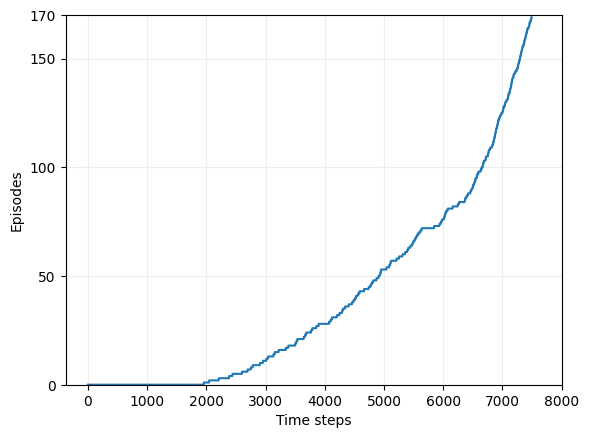

In [52]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(step_episode);
ax.set_ylim([0, 170]);
ax.set_yticks([0, 50, 100, 150, 170]);
ax.set_xticks([x * 1000 for x in range(9)]);
ax.set_ylabel('Episodes')
ax.set_xlabel('Time steps');
ax.grid(c='#eee')

In [56]:
env.reset()
policy = np.argmax(Q, axis=-1)
state = np.array([3, 0])
action = policy[state[0], state[1]]
state_actions = [[state, action]]

while not env.is_terminated():
    observation, reward, terminated, _, _ = env.step(action)
    state = observation['agent']
    action = policy[state[0], state[1]]
    state_actions.append([state, action])

In [67]:
render = np.zeros(shape=(env.rows, env.columns))
for i, sa in enumerate(state_actions):
    state = sa[0]
    render[state[0], state[1]] = i
    print(i, '>>', sa[1])

0 >> 6
1 >> 6
2 >> 6
3 >> 6
4 >> 6
5 >> 6
6 >> 6
7 >> 0


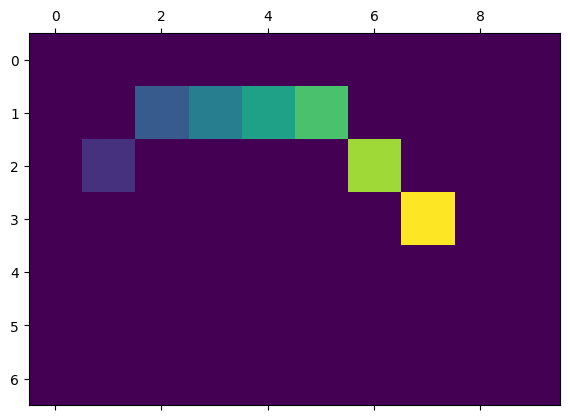

In [66]:
plt.matshow(render)